In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("health_data.csv")
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [3]:
X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]].reshape((1,train_samples.shape[0]))
print(Y_train)

X_test = X[[test_samples]]
Y_test = Y[[test_samples]].reshape((1,test_samples.shape[0]))

[[1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1
  0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1
  0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
  0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0
  0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1
  0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0
  0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0
  0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
  1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0
  1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0
  0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0
  1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0
  0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0
  0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

In [4]:
#the number of classes
no_of_classes = 2

In [5]:
#define sigmoid function:
def sigmoid(z):
    return 1/(np.exp(-1*z)+1)

In [6]:
def cost_function_cross_entropy(logit, Y):
    m = Y.shape[1]
    return -np.sum((Y*np.log(logit)+(1-Y)*np.log(1-logit)))/m

In [7]:
def gradient(w,b,X,Y):
    
    m = X.shape[1]
    logit = sigmoid(np.dot(w.T,X) + b)
    cost = cost_function_cross_entropy(logit, Y)
    dw = np.dot(X, (logit - Y).T)/m
    db = np.sum(logit - Y , axis = 1, keepdims = True)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    gradient = {"dw" : dw, "db" : db}
    return gradient, cost
    

In [8]:
#optimize:
def optimization(w,b,X,Y, epoches, lr_alpha):
    costs = []
    for i in range(epoches):
        gradients, cost = gradient(w,b,X,Y)
        
        dw = gradients["dw"]
        db = gradients["db"]
        
        w = w - lr_alpha*dw
        b = b - lr_alpha*db
        if i % 100 == 0:
            costs.append(cost)
        params = {"w" : w, "b" : b}
    return params, costs

In [18]:
def prediction(w,b,X):
    m = X.shape[1] #no of data points
    Y_prediction = np.zeros((1, m))#prediciton will be one hot encoding for each data
    w = w.reshape(X.shape[0], 1)
    
    logit = sigmoid(np.dot(w.T, X) + b)
    #print(logit)
    for i in range(logit.shape[1]):
        if(logit[0,i] <= 0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    assert(Y_prediction.shape ==(1, m))
    return Y_prediction

In [19]:
def model(X_train, Y_train, X_test, Y_test, epoches = 2000, learning_rate = 0.5):
    w = np.zeros((X_train.shape[0],1))
    b = 0
    parameters, costs = optimization(w, b, X_train, Y_train, epoches, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = prediction(w, b, X_test)
    Y_prediction_train = prediction(w, b, X_train)
    print(Y_prediction_train.shape)
    print(Y_prediction_test.shape)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train[0,:] - Y_train[0,:])) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test[0,:] - Y_test[0,:])) * 100))
    
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epoches}
    
    return d

In [20]:
d = model(X_train.T, Y_train, X_test.T, Y_test, epoches = 200000, learning_rate = 0.00005)

(1, 560)
(1, 317)
train accuracy: 83.39285714285714 %
test accuracy: 79.81072555205047 %


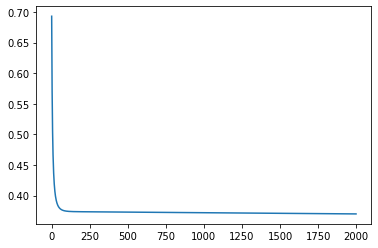

In [21]:
costs = np.squeeze(d['costs'])
plt.plot(costs)

In [ ]:
for i in range(logit.shape[1]):
        for j in range(logit.shape[0]):
            if(logit[j,i] <= 0.5):
                Y_predictionp[j,i] = 0
            else:
                Y_prediction[j,i] = 1
    assert(Y_prediction.shape ==(1, m))
    return Y_prediciton